In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report)
from matplotlib.colors import LinearSegmentedColormap

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("Datos/Transformados/df_limpio.csv", index_col='ID')

In [ ]:
df.head()

In [ ]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('lda', LinearDiscriminantAnalysis())])

parametros = {
    'selector__k': [40, 60, 90],
    'lda__solver': ['lsqr', 'eigen'], 
    'lda__shrinkage': ['auto', 0.1, 0.5, 0.9] }

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='balanced_accuracy',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

lagun_cmap = LinearSegmentedColormap.from_list(
    "lagun_white_purple",
    ["#FFFFFF", "#5B2A57"])

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (F1 Score: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

## Regresion Logistica

Mejores parámetros: {'selector__k': 92, 'logistic__penalty': 'l2', 'logistic__C': 0.01}
              precision    recall  f1-score   support

           0       0.93      0.67      0.78     13442
           1       0.21      0.66      0.32      1812

    accuracy                           0.66     15254
   macro avg       0.57      0.66      0.55     15254
weighted avg       0.85      0.66      0.72     15254



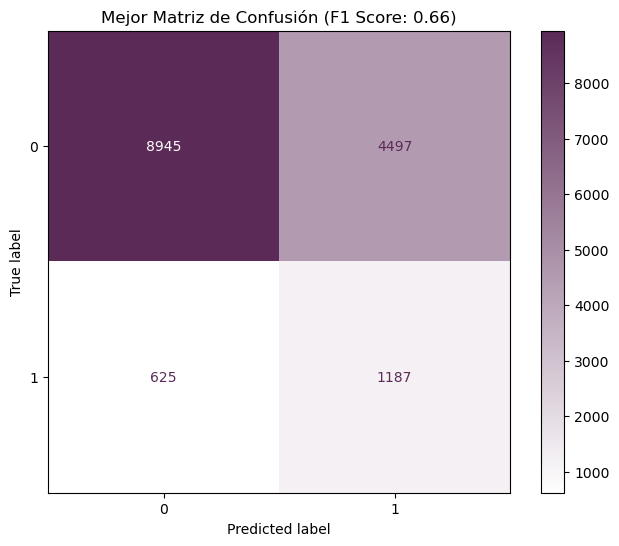

In [20]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),    
    ('smote', SMOTE(random_state=6)),
    ('selector', SelectKBest(score_func=f_classif)),
    ('logistic', LogisticRegression(solver='liblinear', class_weight='balanced'))])

parametros = {
    'logistic__C': [0.01, 0.1, 1, 10],  
    'logistic__penalty': ['l1', 'l2'],
    'selector__k': [40, 60, 80, 92]}

modelo = RandomizedSearchCV(
    pipeline, 
    param_distributions=parametros, 
    n_iter=15, 
    cv=5, 
    scoring='balanced_accuracy', 
    n_jobs=-1, 
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

lagun_cmap = LinearSegmentedColormap.from_list(
    "lagun_white_purple",
    ["#FFFFFF", "#5B2A57"])

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (F1 Score: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

## Naive Bayes

Mejores parámetros: {'selector__k': 60, 'nb__var_smoothing': 0.0001}
              precision    recall  f1-score   support

           0       0.93      0.66      0.77     13442
           1       0.20      0.64      0.31      1812

    accuracy                           0.66     15254
   macro avg       0.57      0.65      0.54     15254
weighted avg       0.85      0.66      0.72     15254



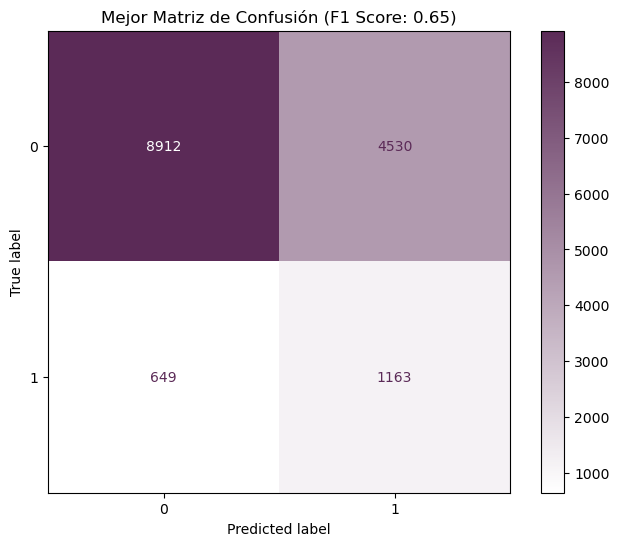

In [21]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('nb', GaussianNB())])

parametros = {
    'selector__k': [40, 60, 80, 92], 
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='balanced_accuracy',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

lagun_cmap = LinearSegmentedColormap.from_list(
    "lagun_white_purple",
    ["#FFFFFF", "#5B2A57"])

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (F1 Score: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

## SVM

Mejores parámetros: {'svm__C': 0.1, 'selector__k': 40}
              precision    recall  f1-score   support

           0       0.94      0.66      0.78     13442
           1       0.21      0.66      0.32      1812

    accuracy                           0.66     15254
   macro avg       0.57      0.66      0.55     15254
weighted avg       0.85      0.66      0.72     15254



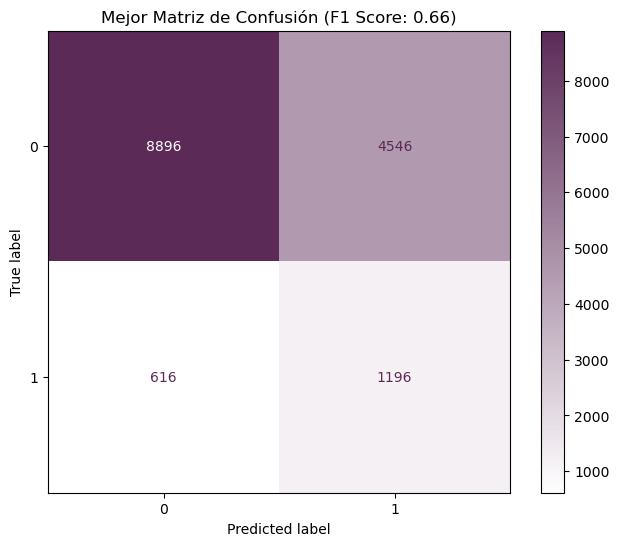

In [23]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('svm', LinearSVC(dual=False, max_iter=5000, class_weight='balanced', random_state=6))])

parametros = {
    'selector__k': [40, 60, 90],
    'svm__C': [0.01, 0.1, 1, 10]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='balanced_accuracy',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

lagun_cmap = LinearSegmentedColormap.from_list(
    "lagun_white_purple",
    ["#FFFFFF", "#5B2A57"])

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (F1 Score: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()